In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Import the .csv file
data = pd.read_csv("E:\\VCU Bridge course\\census_data.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum().sum())

# Remove rows with missing values
data = data.dropna()

# Remove rows with "?" in any column
data = data[(data != '?').all(axis=1)]

   Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   39         State-gov   77516  Bachelors             13   
1           1   50  Self-emp-not-inc   83311  Bachelors             13   
2           2   38           Private  215646    HS-grad              9   
3           3   53           Private  234721       11th              7   
4           4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0           

In [4]:
# Convert character columns to categorical
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype('category')

In [5]:
# One-hot encode categorical variables
features = data[['age', 'education-num', 'hours-per-week', 'workclass', 'occupation', 'marital-status', 'relationship', 
                 'capital-gain', 'capital-loss', 'native-country']]
features = pd.get_dummies(features, drop_first=True)

In [6]:
# Encode the target variable
data['income_encoded'] = np.where(data['income'] == '<=50K', 0, 1)

In [7]:
# Define the target variable
target = data['income_encoded']

[[4675 2119]
 [2620 4153]]


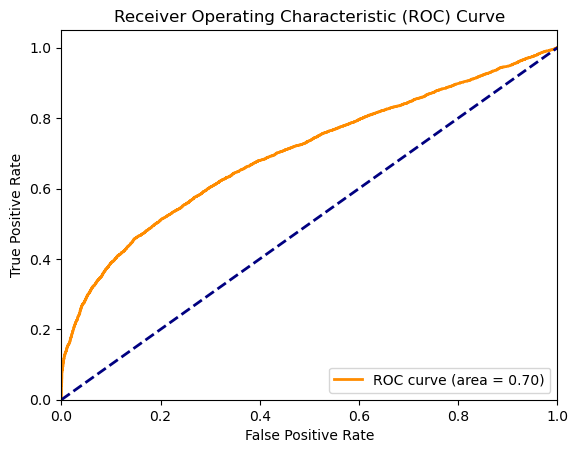

AUC: 0.70


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Fit the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict on the test set
pred_prob = logreg_model.predict_proba(X_test)[:, 1]
pred_class = logreg_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred_class)
print(conf_matrix)
# ROC curve
fpr, tpr, _ = roc_curve(y_test, pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC value
print(f"AUC: {roc_auc:.2f}")

[[4199 2595]
 [2917 3856]]


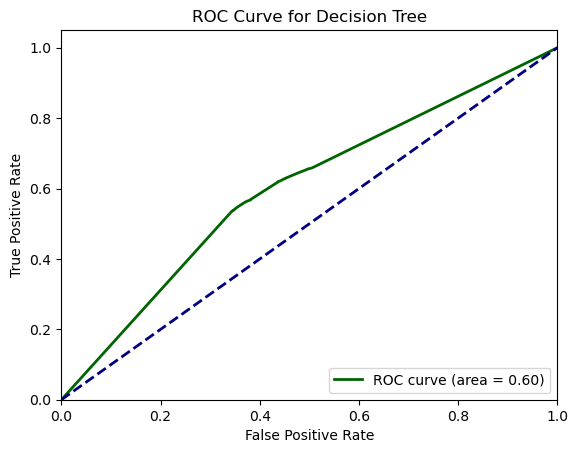

Decision Tree AUC: 0.60


In [10]:
# Fit the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
tree_pred_class = tree_model.predict(X_test)
tree_pred_prob = tree_model.predict_proba(X_test)[:, 1]

# Confusion matrix for the decision tree
tree_conf_matrix = confusion_matrix(y_test, tree_pred_class)
print(tree_conf_matrix)

# ROC curve for the decision tree
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_pred_prob)
tree_roc_auc = auc(tree_fpr, tree_tpr)

# Plot the ROC curve for the decision tree
plt.figure()
plt.plot(tree_fpr, tree_tpr, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Print AUC value for the decision tree
print(f"Decision Tree AUC: {tree_roc_auc:.2f}")